In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/complex_height_weight_data.csv')

In [3]:
data

,Height,Weight
0,174.97 Cm,91.66 kg
1,168.62 Cm,93.78 Kg
2,176.48 Cm,97.7 kG
3,185.23 cm,99.34 KG
4,167.66 Cm,94.64 kG
...,...,...
95,155.36 cm,82.34 kG
96,172.96 cM,95.6 KG
97,172.61 Cm,101.96 KG
98,170.05 Cm,97.59 KG


In [4]:
data.columns

Index(['Height', 'Weight'], dtype='object')

In [5]:
data['Height']

,Height
0,174.97 Cm
1,168.62 Cm
2,176.48 Cm
3,185.23 cm
4,167.66 Cm
...,...
95,155.36 cm
96,172.96 cM
97,172.61 Cm
98,170.05 Cm


In [6]:
data['Weight']

,Weight
0,91.66 kg
1,93.78 Kg
2,97.7 kG
3,99.34 KG
4,94.64 kG
...,...
95,82.34 kG
96,95.6 KG
97,101.96 KG
98,97.59 KG


In [7]:
data['Height'].values

array(['  174.97 Cm   ', '  168.62 Cm   ', '  176.48 Cm   ',
       '  185.23 cm   ', '  167.66 Cm   ', '  167.66 Cm   ',
       '  185.79 Cm   ', '  177.67 Cm   ', '  165.31 cm   ',
       '  175.43 cm   ', '  165.37 cm   ', '  165.34 cM   ',
       '  172.42 Cm   ', '  150.87 Cm   ', '  152.75 cm   ',
       '  164.38 cM   ', '  159.87 Cm   ', '  173.14 cM   ',
       '  160.92 cM   ', '  155.88 Cm   ', '  184.66 cM   ',
       '  167.74 Cm   ', '  170.68 cm   ', '  155.75 cM   ',
       '  164.56 cM   ', '  171.11 Cm   ', '  ? cM   ', '  173.76 cM   ',
       '  ? cm   ', '  167.08 cM   ', '  163.98 CM   ', '  188.52 cm   ',
       '  169.87 CM   ', '  159.42 Cm   ', '  ? cm   ', '  157.79 CM   ',
       '  172.09 Cm   ', '  150.4 Cm   ', '  156.72 cm   ',
       '  171.97 cM   ', '  177.38 cm   ', '  171.71 cM   ',
       '  168.84 cm   ', '  166.99 Cm   ', '  155.21 CM   ',
       '  162.8 CM   ', '  165.39 cM   ', '  180.57 cm   ',
       '  173.44 Cm   ', '  152.37 CM   ', '  17

In [8]:
data['Weight'].values

array(['  91.66 kg  ', '  93.78 Kg  ', '  97.7 kG  ', '  99.34 KG  ',
       '  94.64 kG  ', '  97.47 Kg  ', '  113.04 Kg  ', '  100.82 KG  ',
       '  95.68 Kg  ', '  98.57 KG  ', '  ? kg  ', '  94.27 kg  ',
       '  97.89 KG  ', '  100.21 kg  ', '  87.78 kg  ', '  95.48 kG  ',
       '  91.77 KG  ', '  92.07 kG  ', '  98.13 kG  ', '  93.91 KG  ',
       '  ? kg  ', '  90.94 KG  ', '  ? KG  ', '  ? Kg  ', '  96.99 Kg  ',
       '  107.95 kG  ', '  ? kG  ', '  93.24 kG  ', '  ? kg  ',
       '  92.35 Kg  ', '  94.29 kg  ', '  102.32 KG  ', '  88.69 Kg  ',
       '  92.08 kg  ', '  ? kG  ', '  85.69 kG  ', '  99.81 KG  ',
       '  83.08 kg  ', '  98.27 KG  ', '  93.47 Kg  ', '  98.21 kG  ',
       '  101.34 KG  ', '  89.82 KG  ', '  96.28 kg  ', '  ? Kg  ',
       '  85.22 KG  ', '  95.35 KG  ', '  102.56 kg  ', '  101.96 Kg  ',
       '  82.38 Kg  ', '  91.36 KG  ', '  ? Kg  ', '  ? kG  ',
       '  100.51 KG  ', '  102.87 Kg  ', '  97.29 kG  ', '  ? KG  ',
       '  ? Kg  ', '  99.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  100 non-null    object
 1   Weight  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [12]:
# %% [code]
def extract_numeric(value):
    try:
        return float(re.findall(r'\d+\.\d+', value)[0])
    except IndexError:
        return np.nan


In [13]:
# %% [code]
data['Height'] = data['Height'].apply(extract_numeric)
data['Weight'] = data['Weight'].apply(extract_numeric)


In [14]:
# %% [code]
data['Height'] = data['Height'].astype(float)
data['Weight'] = data['Weight'].astype(float)


In [15]:
# %% [code]
data.describe()

,Height,Weight
count,94.000000,84.000000
mean,168.922021,96.141548
std,9.117366,6.176350
min,143.800000,80.940000
25%,164.425000,92.765000
50%,168.730000,96.305000
75%,173.617500,99.690000
max,188.520000,113.040000


In [17]:
# %% [code]
data.isnull().sum()

,0
Height,6
Weight,16


In [18]:
# %% [code]
data['Height'].fillna(data['Height'].mean(), inplace=True)
data['Weight'].fillna(data['Weight'].mean(), inplace=True)

In [19]:
# %% [code]
data.isnull().sum()


,0
Height,0
Weight,0


In [20]:
# %% [code]
X= data.Height
y= data.Weight


In [21]:
# %% [code]
from sklearn.model_selection import train_test_split


In [22]:
# %% [code]
m = np.linspace(1,5,10)

In [24]:
# %% [code]
m.reshape( -1,1).shape



(10, 1)

In [25]:
# %% [code]
X_train, X_test, y_train, y_test = train_test_split(data.Height.values.reshape(-1,1), data.Weight)

In [26]:
# %% [code]
X_train.shape

(75, 1)

In [27]:
# %% [code]
X_test.shape

(25, 1)

In [30]:
# %% [code]
X_train[3]

array([150.4])

In [31]:
# %% [code]
y_train[0]

91.66

In [32]:
# %% [code]
from sklearn.linear_model import LinearRegression

In [37]:
# %% [code]
linear_regression= LinearRegression()

In [41]:
# %% [code]
linear_regression

LinearRegression()

In [39]:
# %% [code]
X_train_numeric = X_train.astype(np.float64)

In [42]:
# %% [code]
linear_regression.fit(X_train_numeric, y_train)

LinearRegression()

In [43]:
# %% [code]
y_pred = linear_regression.predict(X_test)

In [45]:
# %% [markdown]

In [46]:
# %% [code]
print('Coefficients:', linear_regression.coef_)

Coefficients: [0.38568162]


In [48]:
# %% [code]
print('Intercept:', linear_regression.intercept_)

Intercept: 30.80069407001355


In [49]:
# %% [code]
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 23.48320418150908


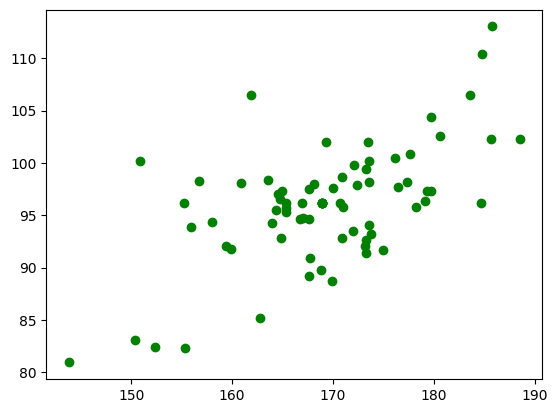

In [50]:
# %% [code]
plt.scatter(X_train, y_train, color='green', label='Training data')

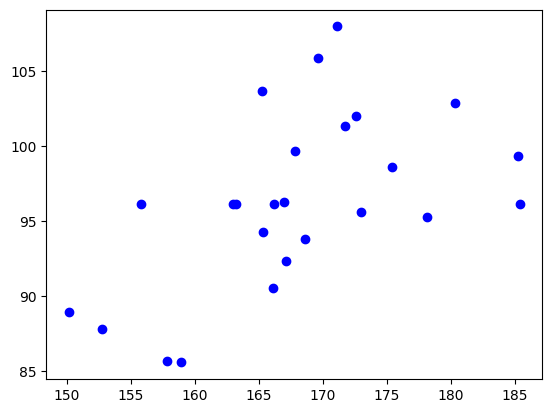

In [51]:
# %% [code]
# Plot the testing data
plt.scatter(X_test, y_test, color='blue', label='Testing data')

In [52]:
# %% [code]
predicted = linear_regression.predict(X_test)
predicted

array([ 94.56929283,  95.24037884,  94.85469723,  92.10093047,
        95.83432854, 100.34294665,  94.88169494,  96.22772379,
        98.46082036,  93.75550461,  95.51806961,  95.2056675 ,
        97.02608474,  91.65739661,  99.50216072,  97.37319819,
        89.71356125,  96.79467576, 102.24050021,  93.65908421,
        97.50818676,  88.6992186 ,  94.51915422, 102.29835246,
        90.87060611])

In [53]:
# %% [code]
expected = y_test
expected

,Weight
11,94.270000
29,92.350000
94,90.500000
62,85.570000
1,93.780000
54,102.870000
51,96.141548
72,105.820000
9,98.570000
52,96.141548


In [54]:
# %% [code]
for p, e in zip(predicted[::], expected[::] ):
    print(f"Predicted: {p:.2f}, Expected: {e:.2f}")

Predicted: 94.57, Expected: 94.27
Predicted: 95.24, Expected: 92.35
Predicted: 94.85, Expected: 90.50
Predicted: 92.10, Expected: 85.57
Predicted: 95.83, Expected: 93.78
Predicted: 100.34, Expected: 102.87
Predicted: 94.88, Expected: 96.14
Predicted: 96.23, Expected: 105.82
Predicted: 98.46, Expected: 98.57
Predicted: 93.76, Expected: 96.14
Predicted: 95.52, Expected: 99.65
Predicted: 95.21, Expected: 96.28
Predicted: 97.03, Expected: 101.34
Predicted: 91.66, Expected: 85.69
Predicted: 99.50, Expected: 95.29
Predicted: 97.37, Expected: 101.96
Predicted: 89.71, Expected: 87.78
Predicted: 96.79, Expected: 107.95
Predicted: 102.24, Expected: 99.34
Predicted: 93.66, Expected: 96.14
Predicted: 97.51, Expected: 95.60
Predicted: 88.70, Expected: 88.94
Predicted: 94.52, Expected: 103.67
Predicted: 102.30, Expected: 96.14
Predicted: 90.87, Expected: 96.14


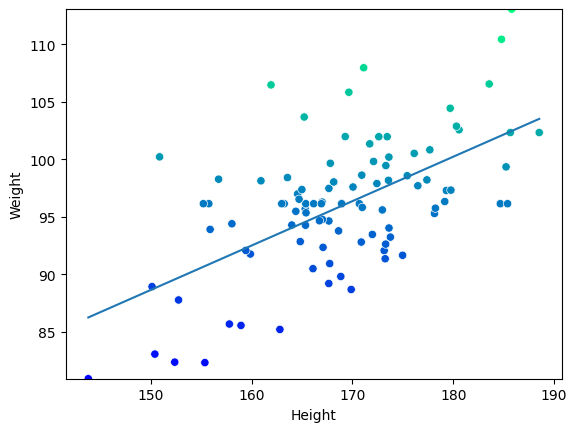

In [55]:
# %% [code]
axes = sns.scatterplot(data=data, x='Height', y='Weight', hue='Weight', palette='winter', legend=False)
axes.set_ylim(min(data.Weight.values), max(data.Weight.values))
x = np.array([min(data.Height.values), max(data.Height.values)]).reshape(-1, 1) # Reshape x to a 2D array
y = linear_regression.predict(x)
plt.plot(x, y)